# Módulo 6 tarefa 3

## 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
# Importanto bibliotecas
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import matplotlib.pyplot as plt

In [2]:
# Importando base de dados
link = "https://raw.githubusercontent.com/gfsilveira/ebac/main/"
link += "03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/b1abb33c4f.csv"
df = pd.read_csv(link)
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
# Verirficando informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

Dicionário de Variáveis

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_01.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_02.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_03.png?raw=true" >

<img src="https://github.com/gfsilveira/ebac/blob/main/03-Cientista%20de%20Dados/02-Crisp-DM/M%C3%B3dulo-06/Dic_04.png?raw=true" >



---



## 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
# Verificando os valores da variável APGAR5
df['APGAR5'].value_counts()

9.0     16076
10.0     8393
8.0      1994
7.0       241
6.0        79
5.0        45
1.0        24
4.0        23
2.0        18
0.0        17
3.0        15
Name: APGAR5, dtype: int64

In [5]:
'''
Para categorizar a variável APGAR5, foi usada a função cut, que cria valores
de acordo com uma lista de corte (bins), e renomeia essas instâncias de acordo
com a marcação (labels)
'''

labels = ['asfixia_severa', 'asfixia_moderada', 'asfixia_leve', 'normal']
bins = [-1.0, 3.0, 5.0, 7.0, 10.0]
df['APGAR5_CLASS'] = pd.cut(
    df['APGAR5'],
    bins=bins,
    labels=labels
)

df['APGAR5_CLASS'].value_counts()

normal              26463
asfixia_leve          320
asfixia_severa         74
asfixia_moderada       68
Name: APGAR5_CLASS, dtype: int64



---



## 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [6]:
# Verificando quantos valores existem na variável SEXO
df['SEXO'].value_counts()

Masculino    13886
Feminino     13138
Name: SEXO, dtype: int64

In [7]:
def grafico_bivariada_qualitativa(
    ges: int,
    df: pd.DataFrame,
    lin: int,
    col: int
  ) -> None:
  '''
  Função que instancia gráfico de barras com o número de pacientes em cada
  classe de APGAR5, dividido por sexo da criança.
  :param ges (int): Indice da lista com as classes do período de gestação;
  :param df (pd.DataFrame): DataFrame analisada;
  :param lin (int): Posição da linha do eixo do gráfico;
  :param col (int): Posição da coluna da eixo do gráfico;
  '''
  # Classes do tempo de gestação
  gestacao = [
      '42 semanas e mais',
      '37 a 41 semanas',
      '32 a 36 semanas',
      '28 a 31 semanas',
      '22 a 27 semanas',
      'Menos de 22 semanas'
  ]

  # Gráfico de barras
  f = sns.countplot(
      x="APGAR5_CLASS",
      hue="SEXO",
      data=df[df['GESTACAO'] == gestacao[ges]],
      ax=ax[lin,col]
  )

  # Título do gráfico
  f.set(title=gestacao[ges])

In [8]:
axs = [
    (0,0),
    (0,1),
    (1,0),
    (1,1),
    (2,0),
    (2,1),
]
axs

[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]

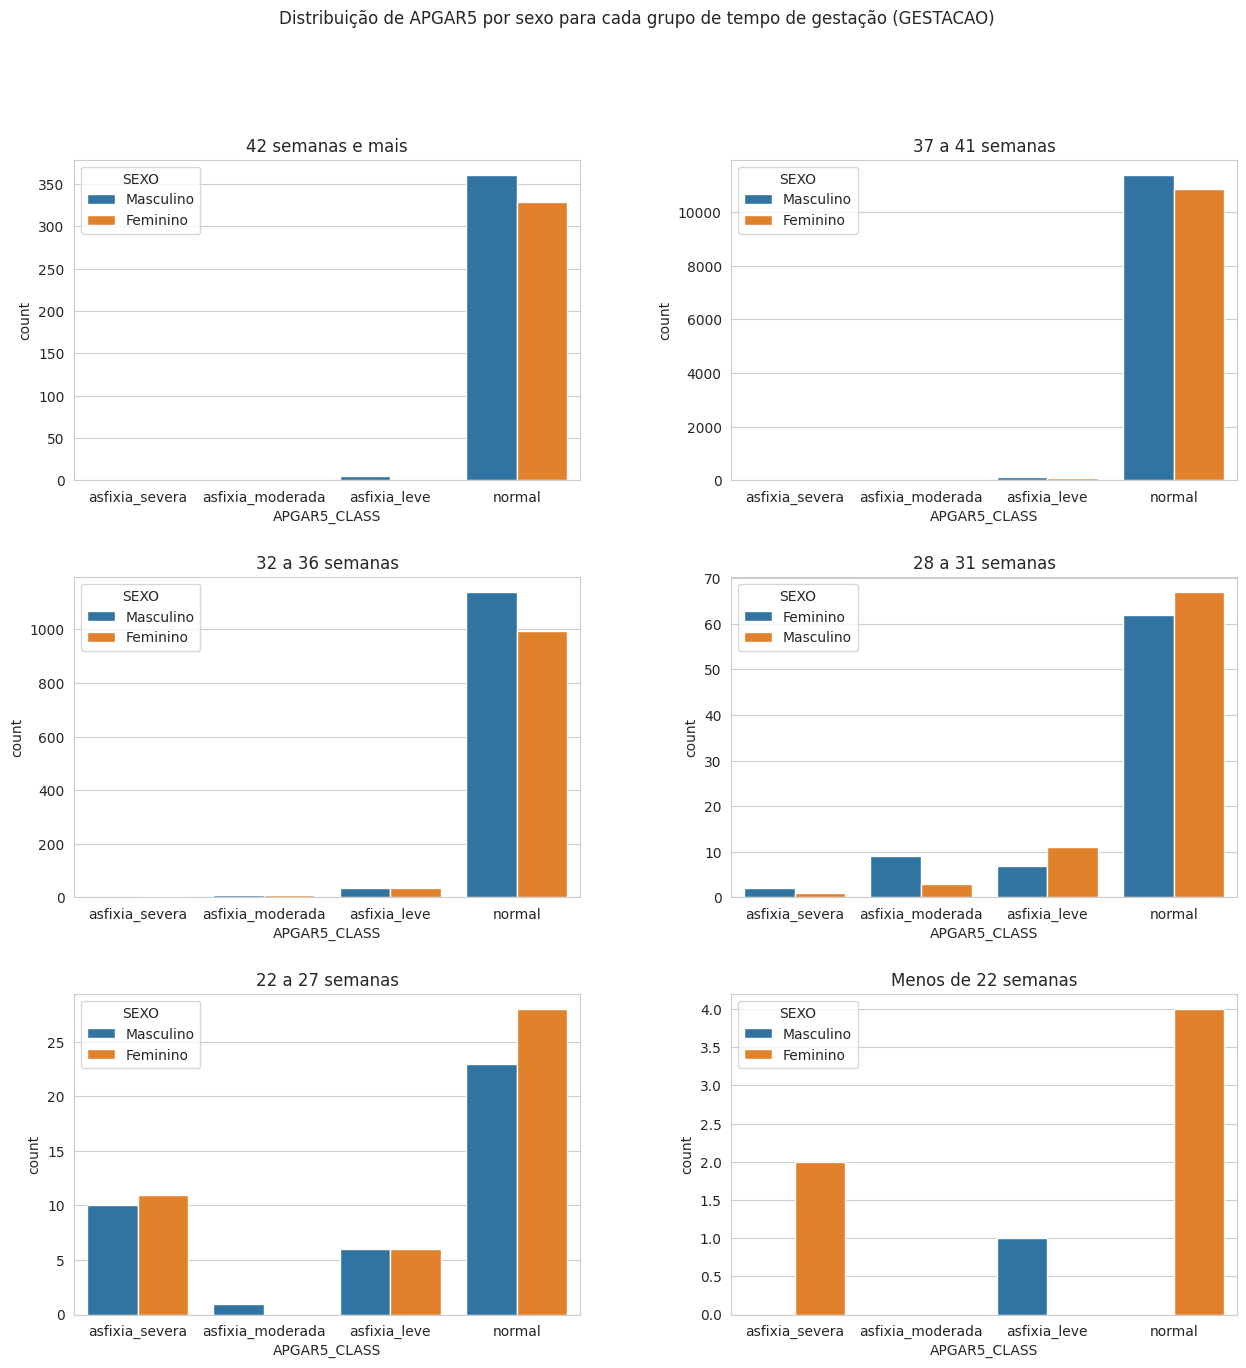

In [9]:
'''
Instancia os gráficos de APGAR5, para cada um dos sexos,
em cada uma das classes de tempo de gestação
'''
fig, ax = plt.subplots(3,2, figsize=(15,15))

plt.suptitle("Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO)")

for ges in range(6):
  grafico_bivariada_qualitativa(
      ges=ges,
      df=df,
      lin=axs[ges][0],
      col=axs[ges][1]
  )

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

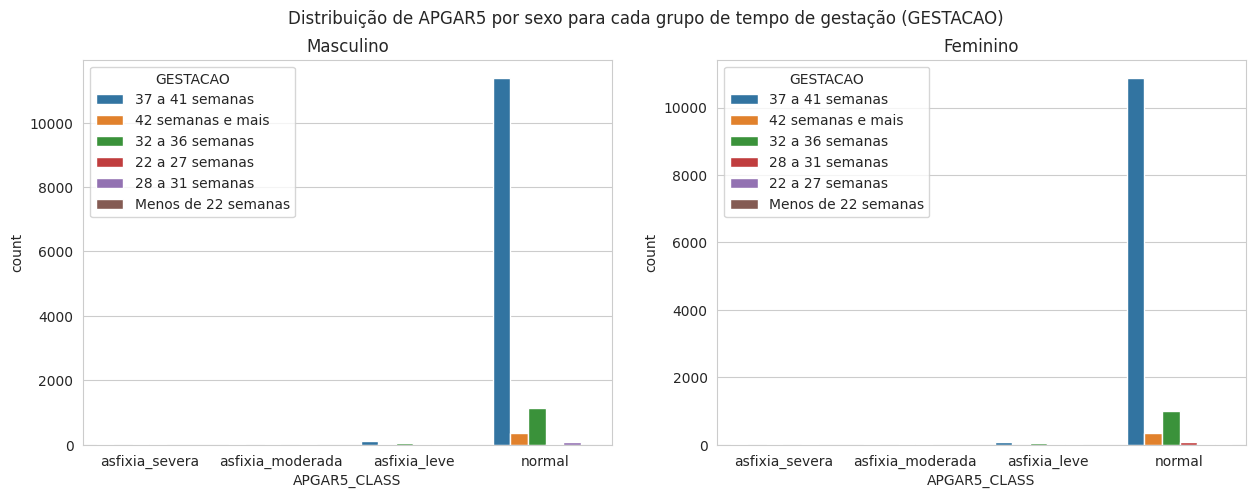

In [10]:
# Gráfico de barras do Apgar5 por tempo de gestação, para cada um dos sexos
fig, ax = plt.subplots(1,2, figsize=(15,5))

plt.suptitle("Distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO)")

f = sns.countplot(
    x="APGAR5_CLASS",
    hue="GESTACAO",
    data=df[df['SEXO'] == "Masculino"],
    ax=ax[0]
)
f.set(title="Masculino")

f = sns.countplot(
    x="APGAR5_CLASS",
    hue="GESTACAO",
    data=df[df['SEXO'] != "Masculino"],
    ax=ax[1]
)
f.set(title="Feminino")

plt.show()



---



##  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [11]:
# Instanciando DataFrame como tabela cruzada entre tempo  de gestação e Apgar5
df_cross = pd.crosstab(df['GESTACAO'], df['APGAR5'])
df_cross

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1




---



##  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [12]:
# Calculando a frequência relativa de cada classe de tempo de gestão
df_cross_relat = df_cross.div(df_cross.sum(axis=1), axis=0)
df_cross_relat

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


In [13]:
# Repetindo o código acima, com outra lógica
df_cross_relat = df_cross.T / df_cross.sum(axis=1)
df_cross_relat = df_cross_relat.T
df_cross_relat

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


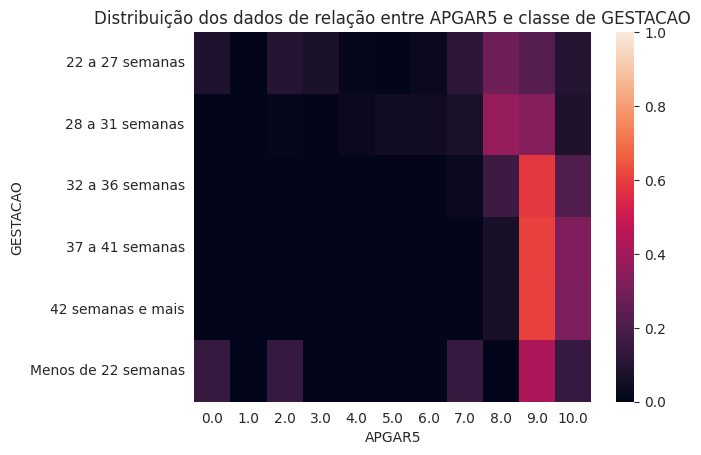

In [14]:
# Analisando a distibuição no heatmap os dados APGAR5 e classe de GESTACAO
plt.title("Distribuição dos dados de relação entre APGAR5 e classe de GESTACAO")
sns.heatmap(df_cross_relat, vmin=0, vmax=1)
plt.show()



---



##  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

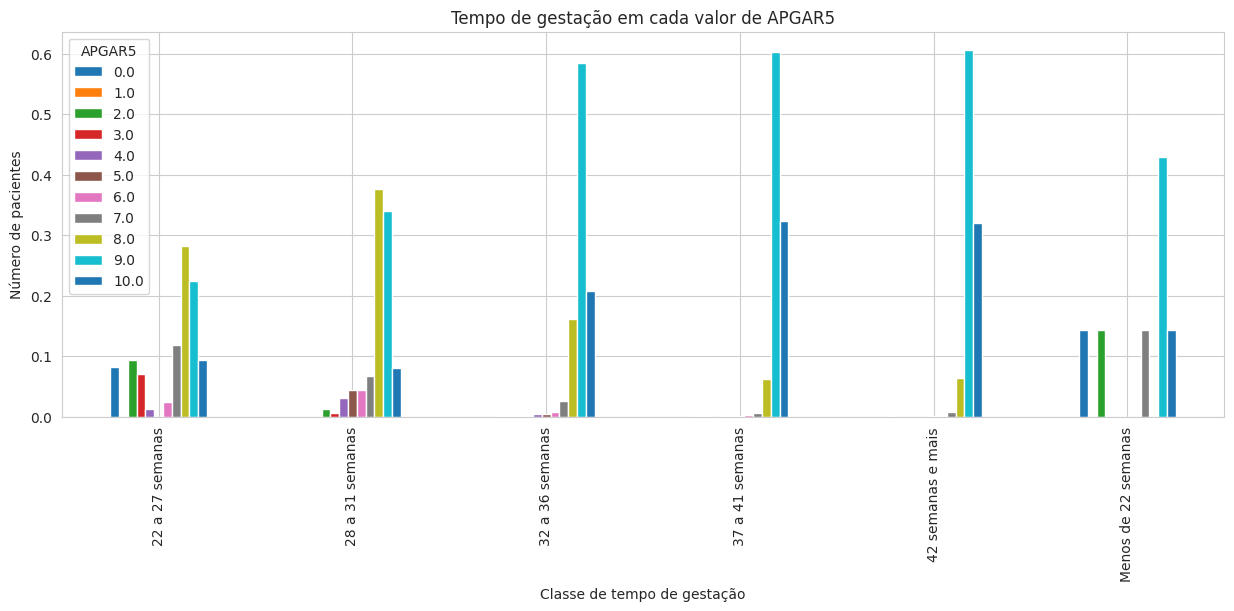

In [15]:
# Plotando o gráfico de tempo de gestação, para cada APGAR5
df_cross_relat.plot.bar(
    figsize=(15,5),
    linewidth=1,
    title="Tempo de gestação em cada valor de APGAR5",
    xlabel="Classe de tempo de gestação",
    ylabel="Número de pacientes",
)
plt.show()

Observa-se que nas classes de tempo de gestação menores, entre 22 a 31 semanas, tem menores Apgar5. Acima de 32 semanas o Apgar5 mais comum é o 9. É interessente observar que com menos de 22 semanas de gestação, também apresenta Apgar5 9.



---



## 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

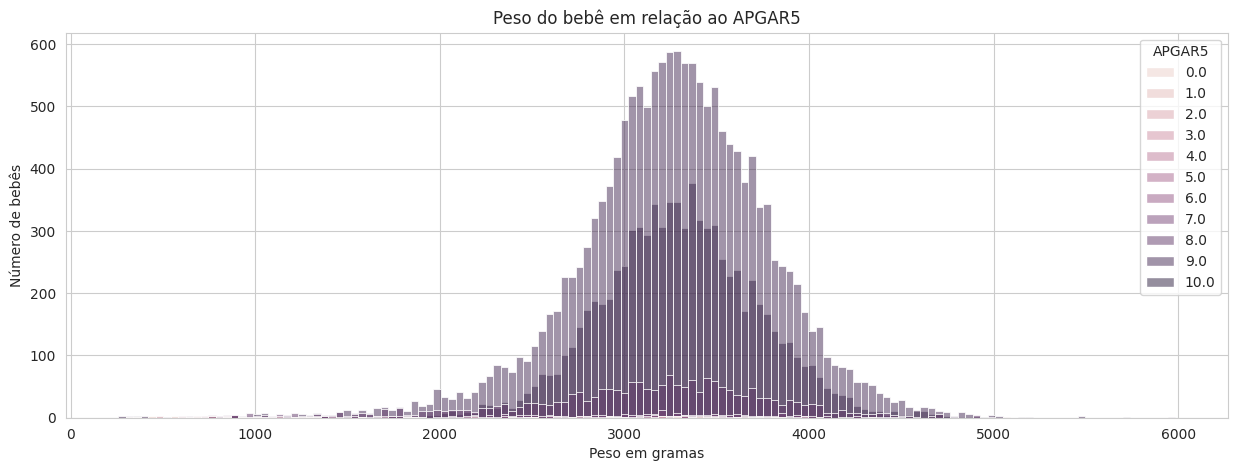

In [16]:
# Analisando o APGAR5 em relação ao peso dos bebês
plt.figure(figsize=(15,5))

plt.title("Peso do bebê em relação ao APGAR5")
sns.histplot(
    x='PESO',
    hue='APGAR5',
    data=df,
)

plt.xlabel("Peso em gramas")
plt.ylabel("Número de bebês")
plt.show()

A análise acima não permite determinar com precisão a condição de Apgar5 nos pesos menores pesos, provavelmente por existirem menos bebes de menores pesos.

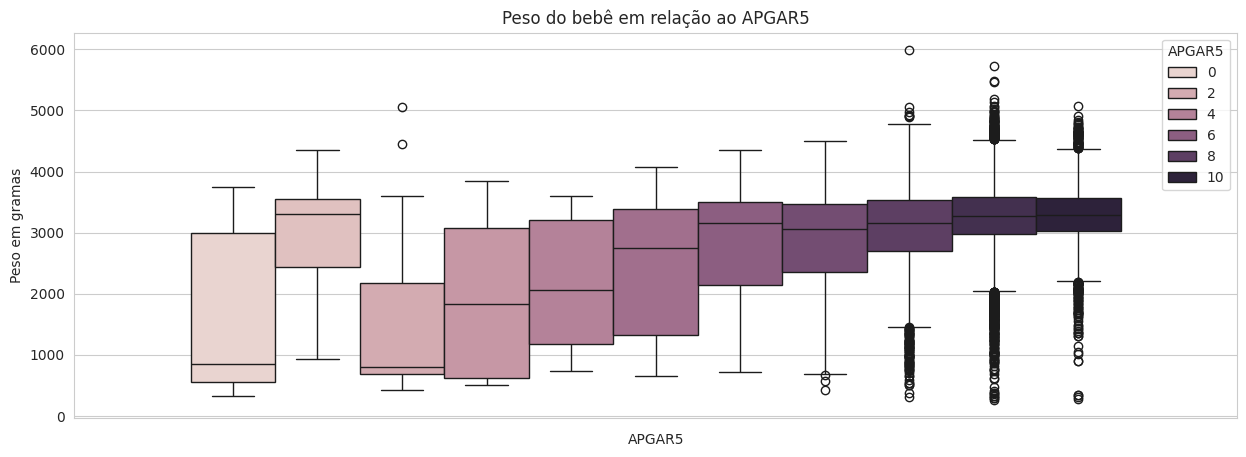

In [17]:
'''
Como à análise acima não permitiu a comparação, foi plotado box plot com a
distribuição dos pesos dos bebês, por cada valor de Apgar5.
'''
plt.figure(figsize=(15,5))

plt.title("Peso do bebê em relação ao APGAR5")
sns.boxplot(
    y='PESO',
    hue='APGAR5',
    data=df,
)

plt.xlabel("APGAR5")
plt.ylabel("Peso em gramas")
plt.show()

Observa-se que maiores distribuiçoes de pesos dos bebês (bebês com maiores pesos) têm maiores Apgar5. A exceção é o Apgar5, que está presente também bebês com maiores pesos. Adicionalmente, as amplitudes das distribuições dos pesos dos valores de Apgar5 maiores são menores.

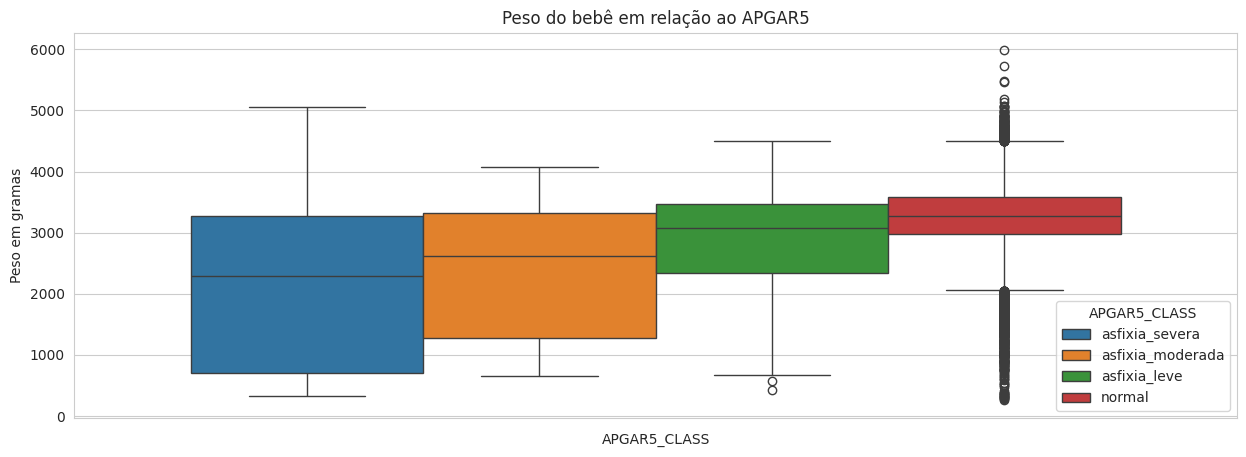

In [18]:
# Podemos verificar também as distribuições de peso por cada classes de Apgar5.
plt.figure(figsize=(15,5))

plt.title("Peso do bebê em relação ao APGAR5")
sns.boxplot(
    y='PESO',
    hue='APGAR5_CLASS',
    data=df,
)

plt.xlabel("APGAR5_CLASS")
plt.ylabel("Peso em gramas")
plt.show()

Buscando comprovar se as médianas das distribuições dos pesos em cada uma das classes de Apgar5

In [19]:
# Descrevendo as medianas dos pesos no grupo de Apgar5.
medianas_apegar = df[['APGAR5','PESO']].groupby('APGAR5').describe()[('PESO',   '50%')].to_frame()
medianas_apegar = medianas_apegar.reset_index()
medianas_apegar.columns = ['APGAR5', "PESO"]
medianas_apegar

,APGAR5,PESO
0,0.0,846.0
1,1.0,3310.0
2,2.0,800.0
3,3.0,1840.0
4,4.0,2055.0
5,5.0,2750.0
6,6.0,3150.0
7,7.0,3060.0
8,8.0,3165.5
9,9.0,3280.0


In [20]:
# Inserindo as classes de cada Apgar5
medianas_apegar['APGAR5_CLASS'] = pd.cut(
    medianas_apegar['APGAR5'],
    bins=bins,
    labels=labels
)

medianas_apegar

,APGAR5,PESO,APGAR5_CLASS
0,0.0,846.0,asfixia_severa
1,1.0,3310.0,asfixia_severa
2,2.0,800.0,asfixia_severa
3,3.0,1840.0,asfixia_severa
4,4.0,2055.0,asfixia_moderada
5,5.0,2750.0,asfixia_moderada
6,6.0,3150.0,asfixia_leve
7,7.0,3060.0,asfixia_leve
8,8.0,3165.5,normal
9,9.0,3280.0,normal


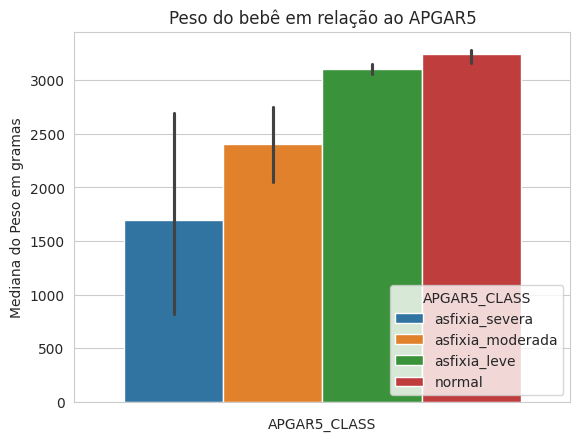

In [21]:
# Verificando as médias das medianas, para cada Apgar5.

plt.title("Peso do bebê em relação ao APGAR5")

sns.barplot(
    y="PESO",
    hue="APGAR5_CLASS",
    data=medianas_apegar
)

plt.xlabel("APGAR5_CLASS")
plt.ylabel("Mediana do Peso em gramas")
plt.show()


Observa-se que as medianas de pesos são diferentes em cada classe Apgar5. A distribuição de pesos nos Apgar5 menores, realmente têm maiores amplitudes.



---

